In [1]:
# ============================================
#        Import Libraries & Load Data
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv')
print("✓ Dataset loaded successfully!")
print(f"Shape: {titanic.shape}")


✓ Dataset loaded successfully!
Shape: (891, 12)


In [2]:
# ============================================
#             Dataset Overview
# ============================================
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

# First rows
print("\n📊 First 5 Rows:")
print(titanic.head())

# Info
print("\n📋 Dataset Info:")
print(titanic.info())

# Statistics
print("\n📈 Descriptive Statistics:")
print(titanic.describe())

# Basic counts
print(f"\n✓ Total Rows: {titanic.shape}")
print(f"✓ Total Columns: {titanic.shape}")
print(f"✓ Duplicates: {titanic.duplicated().sum()}")


DATASET OVERVIEW

📊 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3


MISSING VALUES ANALYSIS

📌 Missing Values:
            Column  Missing_Count  Percentage
Age            Age            177   19.865320
Cabin        Cabin            687   77.104377
Embarked  Embarked              2    0.224467


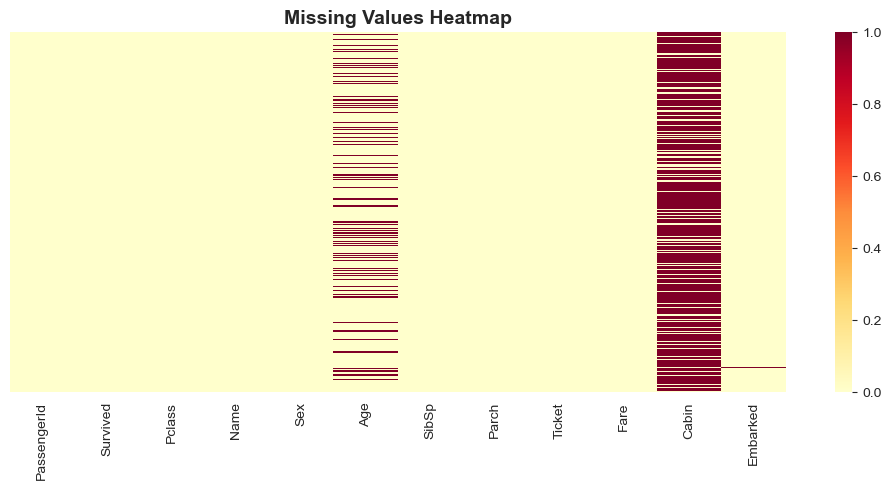

In [3]:
# ============================================
#            Check Missing Values
# ============================================
print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

# Calculate missing values
missing_values = titanic.isnull().sum()
missing_percent = (missing_values / len(titanic)) * 100

missing_df = pd.DataFrame({
    'Column': titanic.columns,
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})

print("\n📌 Missing Values:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(titanic.isnull(), cbar=True, cmap='YlOrRd', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
# ============================================
#            Handle Missing Values
# ============================================
print("\n" + "=" * 60)
print("HANDLING MISSING VALUES")
print("=" * 60)

# Age: Fill with median
age_median = titanic['Age'].median()
titanic['Age'].fillna(age_median, inplace=True)
print(f"✓ Age: Filled {titanic['Age'].isnull().sum()} missing values with median ({age_median})")

# Embarked: Fill with mode
embarked_mode = titanic['Embarked'].mode()
titanic['Embarked'].fillna(embarked_mode, inplace=True)
print(f"✓ Embarked: Filled {titanic['Embarked'].isnull().sum()} missing values with mode ({embarked_mode})")

# Cabin: Drop (too many missing)
titanic.drop('Cabin', axis=1, inplace=True)
print("✓ Cabin: Dropped (687 missing values)")

# Verify
print(f"\n✓ Final Missing Values: {titanic.isnull().sum().sum()}")
print("✓ Data cleaning complete!")



HANDLING MISSING VALUES
✓ Age: Filled 0 missing values with median (28.0)
✓ Embarked: Filled 2 missing values with mode (0    S
Name: Embarked, dtype: object)
✓ Cabin: Dropped (687 missing values)

✓ Final Missing Values: 2
✓ Data cleaning complete!



NUMERICAL FEATURES ANALYSIS


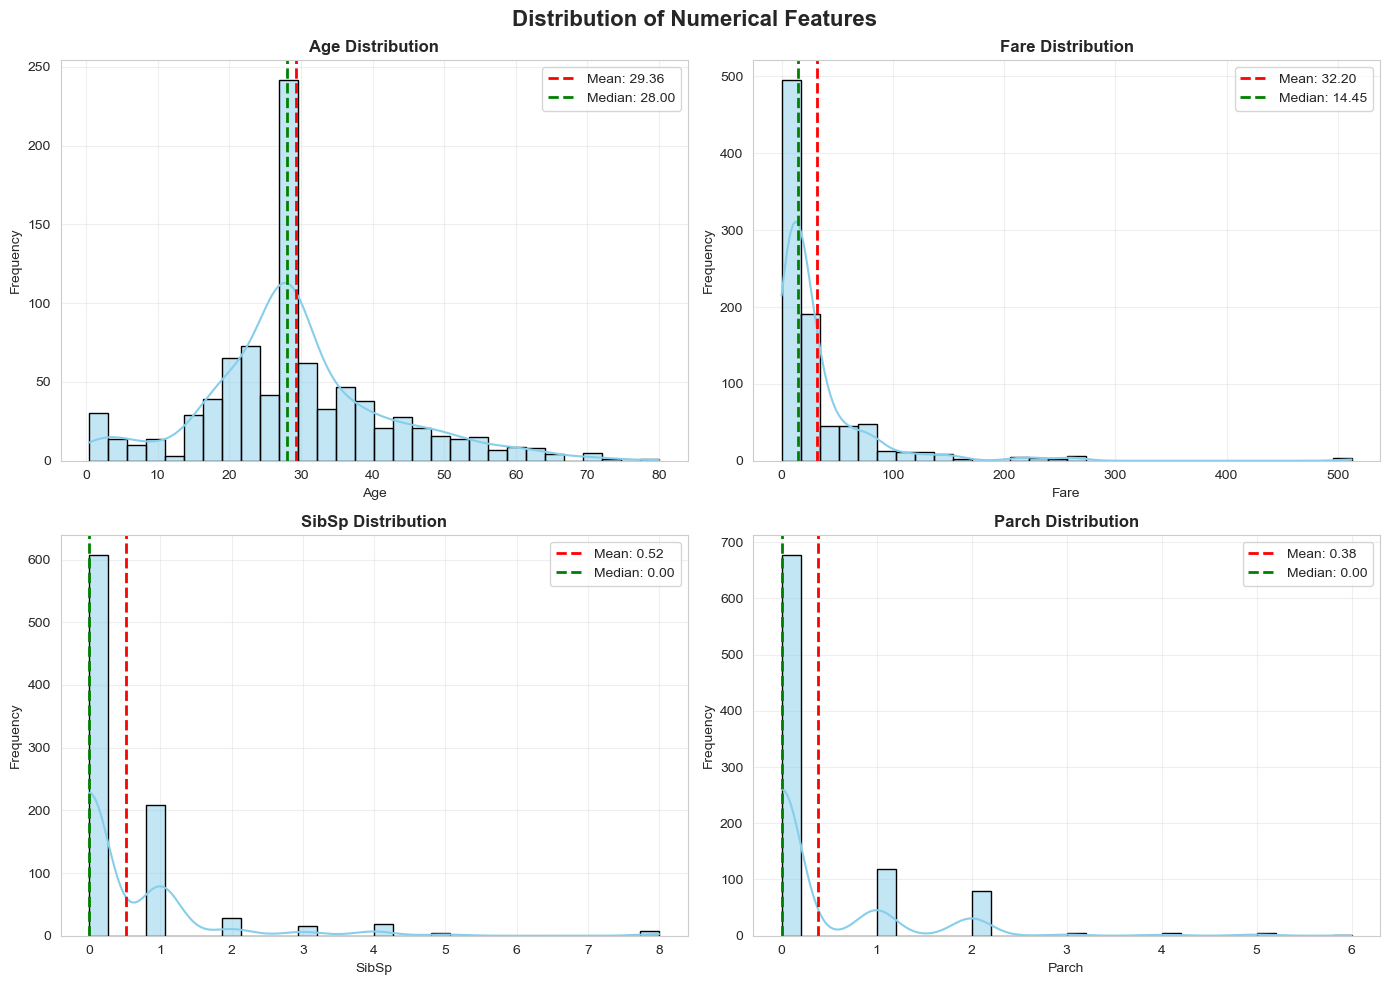


📊 Numerical Statistics:
          Age    Fare   SibSp   Parch
count  891.00  891.00  891.00  891.00
mean    29.36   32.20    0.52    0.38
std     13.02   49.69    1.10    0.81
min      0.42    0.00    0.00    0.00
25%     22.00    7.91    0.00    0.00
50%     28.00   14.45    0.00    0.00
75%     35.00   31.00    1.00    0.00
max     80.00  512.33    8.00    6.00


In [5]:
# ============================================
#       Numerical Features Distribution
# ============================================
print("\n" + "=" * 60)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 60)

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Histogram with KDE
    sns.histplot(titanic[col], kde=True, ax=ax, bins=30, color='skyblue', edgecolor='black')
    
    # Add statistics
    mean_val = titanic[col].mean()
    median_val = titanic[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'{col} Distribution', fontweight='bold', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('02_numerical_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("\n📊 Numerical Statistics:")
print(titanic[numerical_cols].describe().round(2))



CATEGORICAL FEATURES ANALYSIS


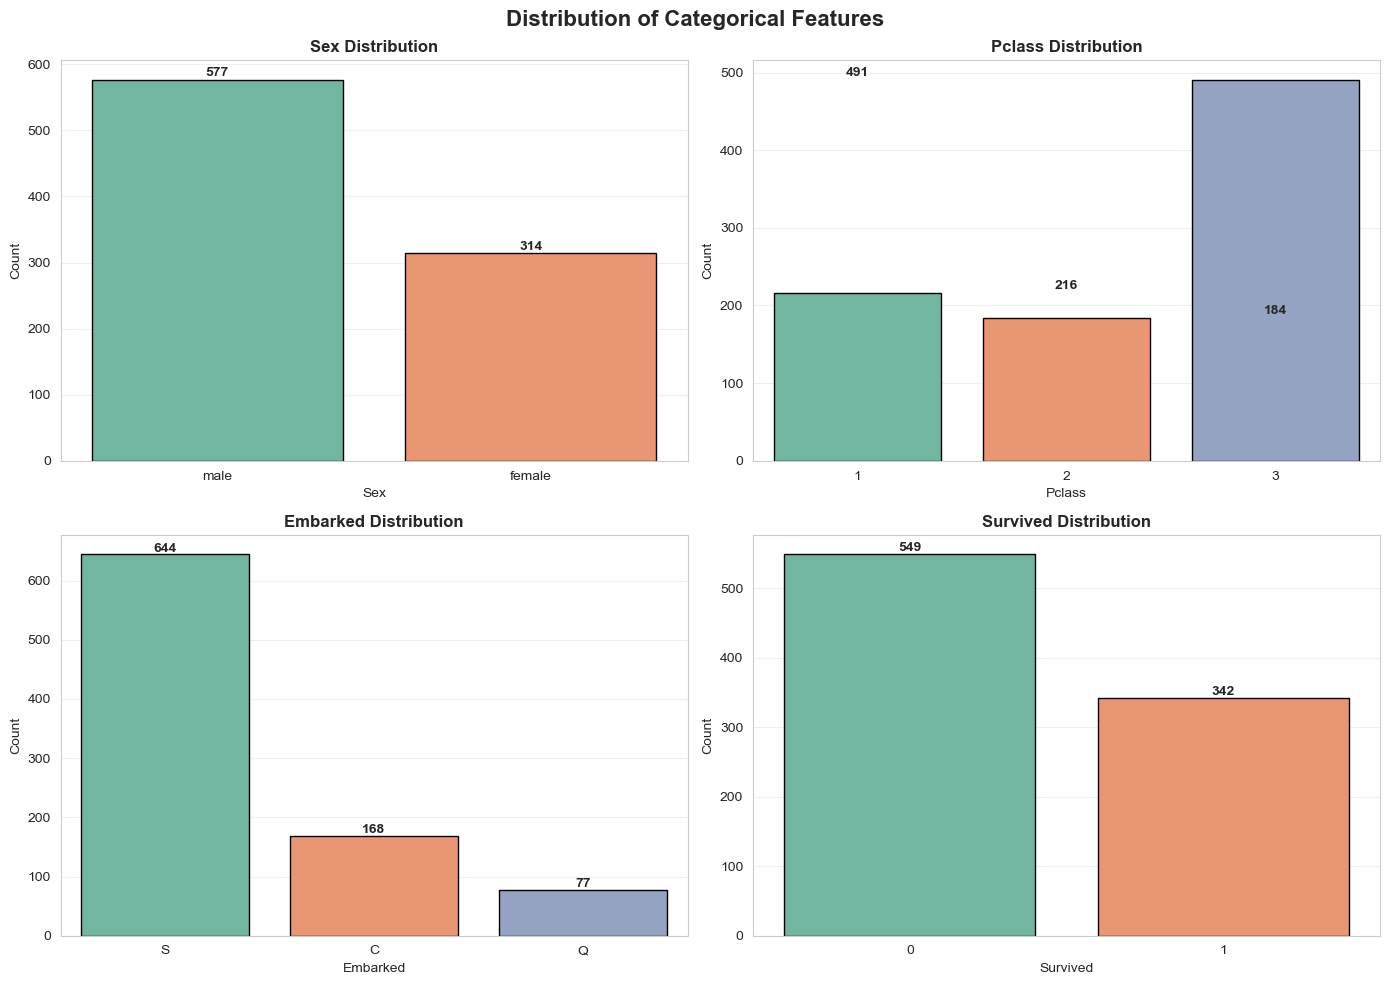


Sex:
Sex
male      577
female    314
Name: count, dtype: int64
Unique values: 2

Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Unique values: 3

Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Unique values: 3

Survived:
Survived
0    549
1    342
Name: count, dtype: int64
Unique values: 2


In [6]:
# ============================================
#      Categorical Features Distribution
# ============================================
print("\n" + "=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

categorical_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(categorical_cols):
    ax = axes[idx // 2, idx % 2]
    
    # Count plot
    counts = titanic[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='Set2', edgecolor='black')
    
    # Add value labels
    for i, v in enumerate(counts.values):
        ax.text(i, v + 5, str(v), ha='center', fontweight='bold')
    
    ax.set_title(f'{col} Distribution', fontweight='bold', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('03_categorical_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print value counts
for col in categorical_cols:
    print(f"\n{col}:")
    print(titanic[col].value_counts())
    print(f"Unique values: {titanic[col].nunique()}")
